In [370]:
import pandas as pd

In [371]:
df = pd.read_csv('train.csv', index_col=False)
df_test = pd.read_csv('test.csv')

In [372]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.Fare.fillna(df.Fare.mean(), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [373]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [374]:
dummy_sex = pd.get_dummies(df.Sex)
dummy_sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [375]:
dummy_embarked = pd.get_dummies(df.Embarked)
dummy_embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [376]:
dummy_pclass = pd.get_dummies(df.Pclass)
dummy_pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [377]:
df_merg = pd.concat([df, dummy_pclass, dummy_sex, dummy_embarked], axis=1)
df_merg.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1


In [378]:
df_merg.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',       'Cabin',    'Embarked',
                   1,             2,             3,      'female',
              'male',           'C',           'Q',           'S'],
      dtype='object')

In [379]:
df_merg_feat = df_merg[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'female', 'male', 'C',
       'Q', 'S']]
df_merg_feat = df_merg_feat.set_index('PassengerId')
df_merg_feat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
plt.style.use("ggplot")
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set_palette("bwr")

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [381]:
nb = GaussianNB()
lr = LogisticRegression(max_iter = 2000)
dt = DecisionTreeClassifier(random_state=0, max_depth=7)
rf = RandomForestClassifier(random_state=0, max_depth=7)
svc = SVC(probability = True)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state =1)
vot = VotingClassifier(
    estimators = [('nb',nb), ('lr',lr), ('dt',dt), ('rf',rf), ('svc',svc), ('knn',knn), ('xgb',xgb)],
    voting = 'soft'
)

models = [nb, lr, dt, rf, svc, knn, xgb, vot]
models_name = [
    "Naive Bayes",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "SVM",
    "K-Nearest Neighbor",
    "XGBoost",
    "Voting"
]

In [382]:
df_merg_feat = df_merg_feat.dropna()
df_merg_feat

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
889,0,3,29.699118,1,2,23.4500,1,0,0,0,1


In [383]:
results_base = {}

for index, model in enumerate(models):
    cv = cross_val_score(model, df_merg_feat.drop(columns=['Survived']), df_merg_feat.Survived, cv=10)  # 10 fold cross validation
    results_base[models_name[index]] = cv.mean() * 100.0
    print("Baseline using", models_name[index], "=", cv.mean() * 100.0, "%", "with std:", cv.std())

Baseline using Naive Bayes = 78.56679151061174 % with std: 0.01931015825522771
Baseline using Logistic Regression = 79.57553058676655 % with std: 0.0227078747434069
Baseline using Decision Tree = 82.27465667915106 % with std: 0.04213448189617792
Baseline using Random Forest = 83.84269662921348 % with std: 0.05087245389036853
Baseline using SVM = 68.13233458177278 % with std: 0.04384864151111265
Baseline using K-Nearest Neighbor = 70.93757802746566 % with std: 0.04011935299946744
Baseline using XGBoost = 81.37328339575531 % with std: 0.0409663188430721
Baseline using Voting = 82.8314606741573 % with std: 0.043087507075737934


In [384]:
dummy_sex_t = pd.get_dummies(df_test.Sex)
dummy_sex_t.head()
dummy_embarked_t = pd.get_dummies(df_test.Embarked)
dummy_embarked_t.head()

df_test_merg = pd.concat([df_test, dummy_sex_t, dummy_embarked_t], axis=1)
df_test_merg = df_test_merg[['PassengerId', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'female', 'male', 'C',
       'Q', 'S']]
df_test_merg = df_test_merg.set_index('PassengerId')
#df_test_merg = df_test_merg.dropna()
df_test_merg.Age.fillna(df_test_merg.Age.mean(), inplace=True)
df_test_merg.Fare.fillna(df_test_merg.Fare.mean(), inplace=True)
df_test_merg

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,
892,3,34.50000,0,0,7.8292,0,1,0,1,0
893,3,47.00000,1,0,7.0000,1,0,0,0,1
894,2,62.00000,0,0,9.6875,0,1,0,1,0
895,3,27.00000,0,0,8.6625,0,1,0,0,1
896,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,3,30.27259,0,0,8.0500,0,1,0,0,1
1306,1,39.00000,0,0,108.9000,1,0,1,0,0
1307,3,38.50000,0,0,7.2500,0,1,0,0,1


<AxesSubplot:ylabel='PassengerId'>

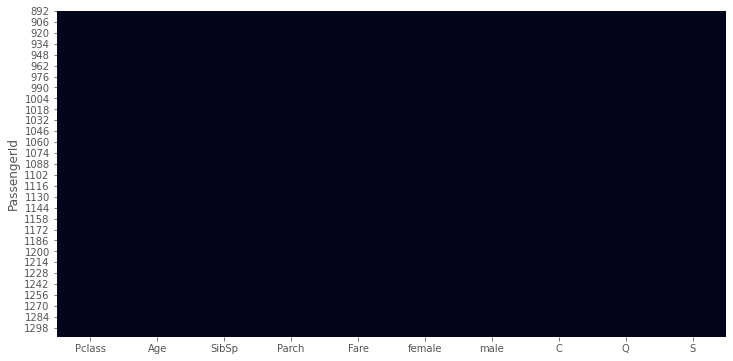

In [385]:
plt.figure(figsize=(12,6))
sns.heatmap(df_test_merg.isnull(),cbar=False)

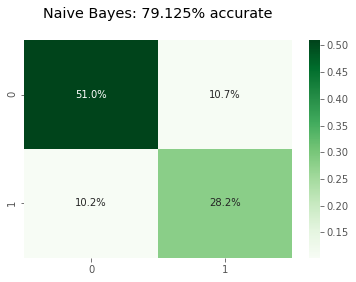

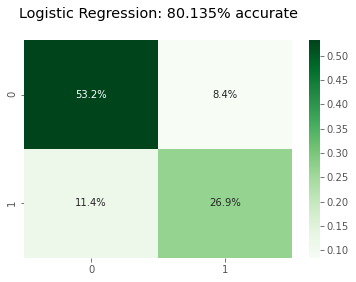

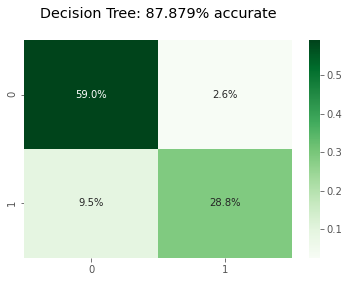

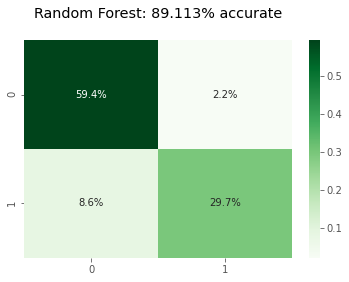

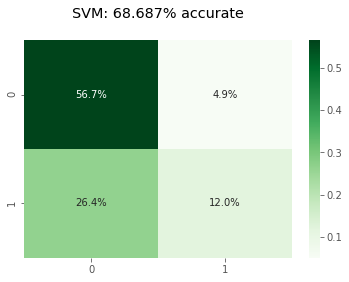

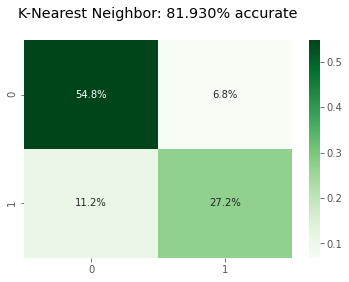

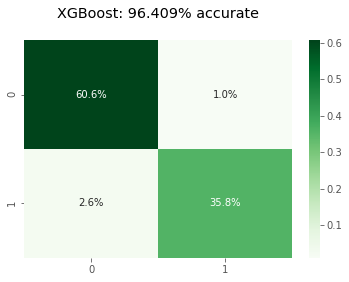

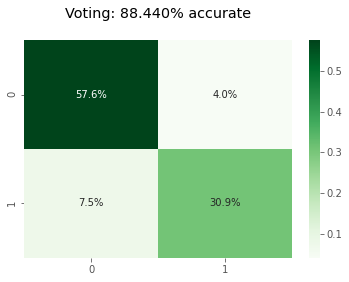

In [386]:
from sklearn.metrics import accuracy_score, confusion_matrix

results = {}

for index, model in enumerate(models):
    model.fit(df_merg_feat.drop(columns=['Survived']), df_merg_feat.Survived)
    predict = model.predict(df_merg_feat.drop(columns=['Survived']))
    
    confuse = confusion_matrix(df_merg_feat.Survived, predict)
    accur = accuracy_score(df_merg_feat.Survived, predict)
    results[models_name[index]] = accur * 100.0
    
    title = models_name[index] + ": " + "{:.3f}%".format(accur*100) + " accurate\n"
    ax = sns.heatmap(confuse/np.sum(confuse), annot=True, fmt='.1%', cmap="Greens")
    ax.set_title(title)
    plt.show()
   # """

In [387]:
rf.fit(df_merg_feat.drop(columns=['Survived']), df_merg_feat.Survived)
predict = xgb.predict(df_test_merg)
"""
confuse = confusion_matrix(y_test, predict)
accur = accuracy_score(y_test, predict)
results[models_name[index]] = accur * 100.0

title = models_name[index] + ": " + "{:.3f}%".format(accur*100) + " accurate\n"
ax = sns.heatmap(confuse/np.sum(confuse), annot=True, fmt='.1%', cmap="Greens")
ax.set_title(title)
plt.show()
"""

'\nconfuse = confusion_matrix(y_test, predict)\naccur = accuracy_score(y_test, predict)\nresults[models_name[index]] = accur * 100.0\n\ntitle = models_name[index] + ": " + "{:.3f}%".format(accur*100) + " accurate\n"\nax = sns.heatmap(confuse/np.sum(confuse), annot=True, fmt=\'.1%\', cmap="Greens")\nax.set_title(title)\nplt.show()\n'

In [388]:
df_test_merg['Survived'] = predict
df_test_merg

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Survived
PassengerId,,,,,,,,,,,
892,3,34.50000,0,0,7.8292,0,1,0,1,0,0
893,3,47.00000,1,0,7.0000,1,0,0,0,1,0
894,2,62.00000,0,0,9.6875,0,1,0,1,0,0
895,3,27.00000,0,0,8.6625,0,1,0,0,1,0
896,3,22.00000,1,1,12.2875,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,30.27259,0,0,8.0500,0,1,0,0,1,0
1306,1,39.00000,0,0,108.9000,1,0,1,0,0,1
1307,3,38.50000,0,0,7.2500,0,1,0,0,1,0


In [389]:
df_test_merg['Survived'].to_csv('Titanic_predct.csv')

In [393]:

from sklearn.model_selection import StratifiedKFold
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(df_merg_feat.drop(columns=['Survived']), df_merg_feat.Survived):
    print('\n{} of kfold {}'.format(i, kf.n_splits))

    xtr, xvl = df_merg_feat.drop(columns=['Survived']).loc[train_index], df_merg_feat.drop(columns=['Survived']).loc[test_index]
    ytr, yvl = df_merg_feat.Survived[train_index], df_merg_feat.Survived[test_index]
    
#for index, model in enumerate(models):
    model = RandomForestClassifier(random_state=0, max_depth=7)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
pred_test = model.predict(df_test_merg1)
#pred = model.predict_proba(xvl)[:,1]




1 of kfold 5


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([0], dtype='int64', name='PassengerId'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [394]:
ytr

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 713, dtype: int64

In [341]:
pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,